## マイク 10 度刻みでの計測

10 度刻みで計測してスペクトルを改めて確認  
マイク補正のデータベース用


In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_spectrum_amplitude

In [3]:
angle_list = np.arange(0, 100, 10)

In [4]:
df_spec = pd.DataFrame()
df_ampli = pd.DataFrame()

In [5]:
band_freq_label = np.linspace(4000, 5000, 4)
for i in range(5, 13):
    tmp = np.linspace(1000 * i, 1000 * (i + 1), 4)
    band_freq_label = np.concatenate([band_freq_label, tmp])

In [10]:
for angle in angle_list:
    sample = readwav(f"../data/mic-angle-10deg/angle{angle}.wav")
    spec, ampli = get_spectrum_amplitude(sample, interval_length=0.2)
    df_spec_tmp = pd.DataFrame(
        {"frequency": band_freq_label, "spectrum": spec, "angle": angle}
    )
    df_ampli_tmp = pd.DataFrame({"amplitude": [ampli], "angle": angle})
    df_spec = pd.concat([df_spec, df_spec_tmp])
    df_ampli = pd.concat([df_ampli, df_ampli_tmp])
df_spec.reset_index(drop=True, inplace=True)
df_ampli.reset_index(drop=True, inplace=True)

In [11]:
df_spec.head()

,frequency,spectrum,angle
0,4000.000000,0.557843,0
1,4333.333333,0.951476,0
2,4666.666667,1.000000,0
3,5000.000000,0.523535,0
4,5000.000000,0.476044,0


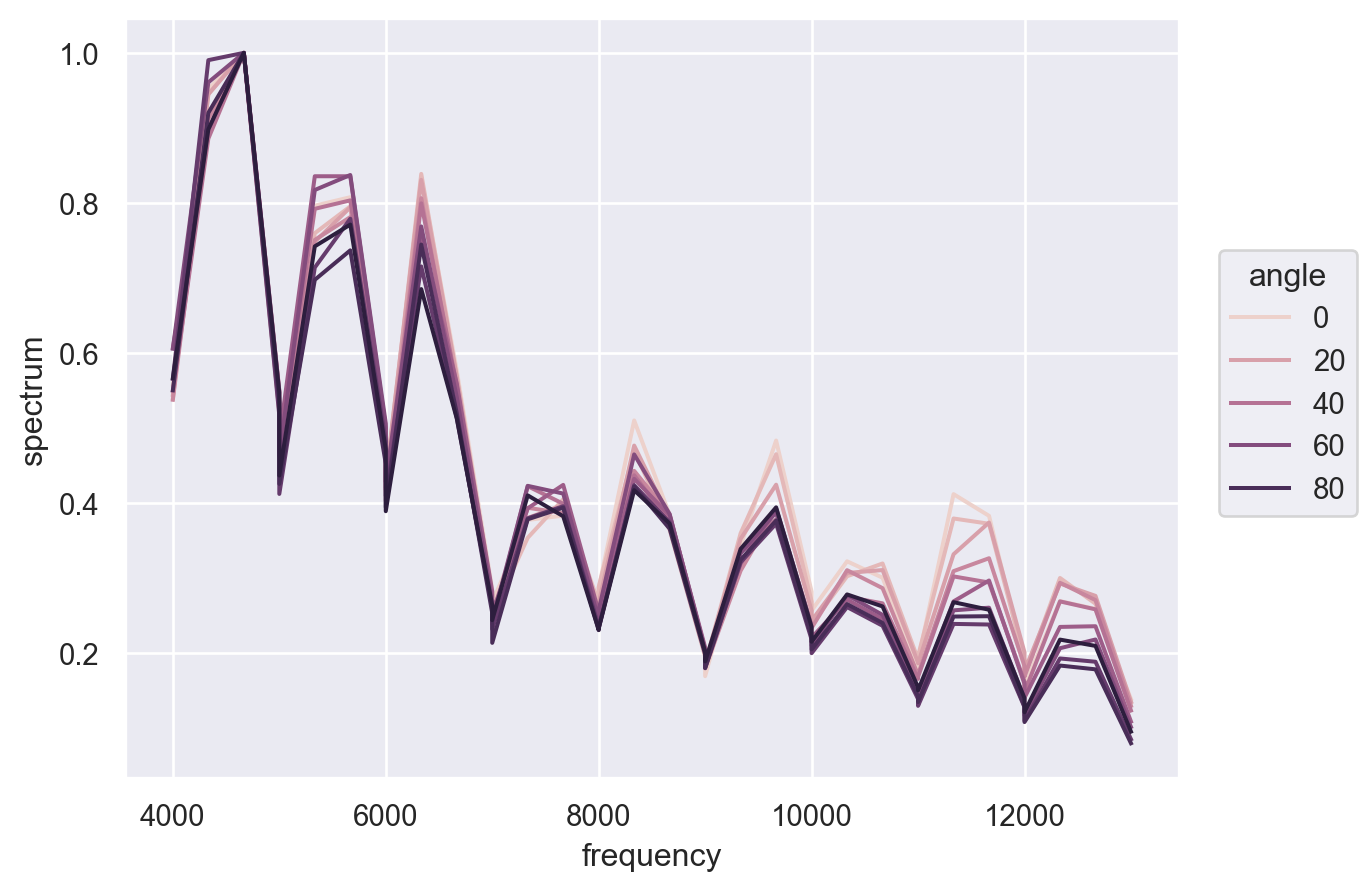

In [12]:
(so.Plot(df_spec, x="frequency", y="spectrum", color="angle").add(so.Lines()))

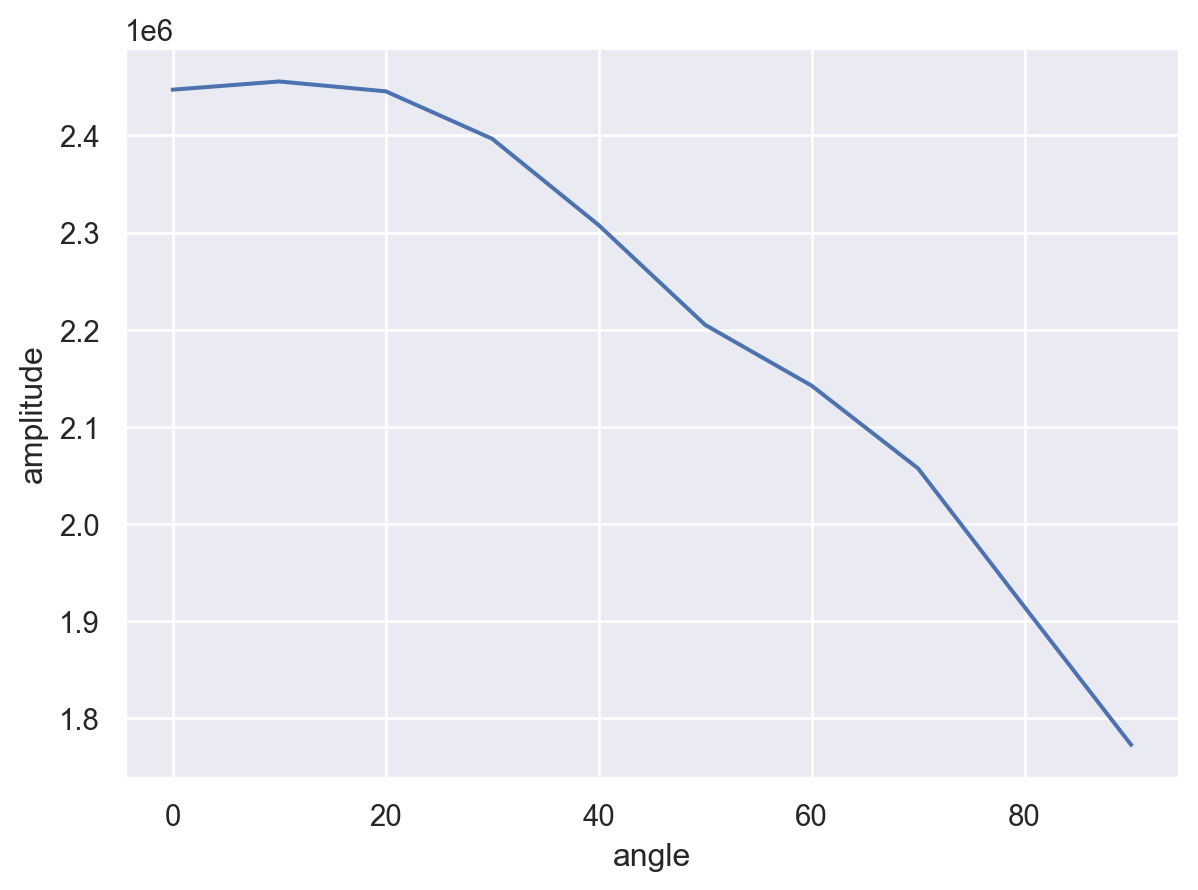

In [13]:
(so.Plot(df_ampli, x="angle", y="amplitude").add(so.Lines()))